In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#reading only the columns required from dataset
df = pd.read_csv('drive/My Drive/water-treatment.data',usecols = ['date','Q-E','PH-E','ZN-E','DQO-E','DQO-S'])

print(df.head())
#print(df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
#converting non-numeric columns to numeric
temp = df.drop('date', axis = 1)
temp = temp.apply(pd.to_numeric, errors = 'coerce')

df = pd.concat([df['date'],temp],axis=1,sort=False)
print(df.head())
print(df.dtypes)

       date      Q-E  PH-E  DBO-E  DQO-E  DQO-S
0  D-1/3/90  44101.0   7.8    NaN  407.0   84.0
1  D-2/3/90  39024.0   7.7    NaN  443.0   91.0
2  D-4/3/90  32229.0   7.6    NaN  528.0  128.0
3  D-5/3/90  35023.0   7.9  205.0  588.0  104.0
4  D-6/3/90  36924.0   8.0  242.0  496.0  108.0
date      object
Q-E      float64
PH-E     float64
DBO-E    float64
DQO-E    float64
DQO-S    float64
dtype: object


In [ ]:
#handling NaN values - replacing by median
print(df.isnull().sum())

cols = ['Q-E', 'PH-E', 'ZN-E', 'DQO-E', 'DQO-S']
for col in cols:
    m = df[col].mean()
    df[col].fillna(m, inplace=True)

print(df.isnull().sum()) #no more null values
print(df.head())

date      0
Q-E      18
PH-E      0
DBO-E    23
DQO-E     6
DQO-S    18
dtype: int64
date     0
Q-E      0
PH-E     0
DBO-E    0
DQO-E    0
DQO-S    0
dtype: int64
       date      Q-E  PH-E       DBO-E  DQO-E  DQO-S
0  D-1/3/90  44101.0   7.8  188.714286  407.0   84.0
1  D-2/3/90  39024.0   7.7  188.714286  443.0   91.0
2  D-4/3/90  32229.0   7.6  188.714286  528.0  128.0
3  D-5/3/90  35023.0   7.9  205.000000  588.0  104.0
4  D-6/3/90  36924.0   8.0  242.000000  496.0  108.0


/home/hduser/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


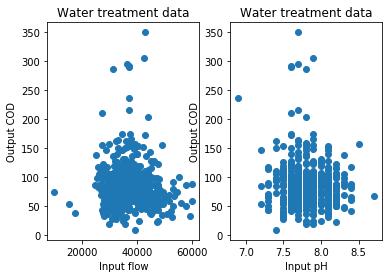

In [ ]:
#visualizing data

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(df['Q-E'],df['DQO-S'])
ax1.set_title('Water treatment data')
ax1.set_xlabel('Input flow')
ax1.set_ylabel('Output COD')

ax2.scatter(df['PH-E'],df['DQO-S'])
ax2.set_title('Water treatment data')
ax2.set_xlabel('Input pH')
ax2.set_ylabel('Output COD')

fig.show()

In [ ]:
#X-y split
data = df.drop(['date'], axis=1)
X = data.drop(['DQO-S'], axis=1).values
y = data['DQO-S'].values

#Train-Test-Split
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=0.33, random_state=42)
X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
#Scaling the data
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)
X_val = MinMaxScaler().fit_transform(X_val)

(353, 4)

In [ ]:
#Model-Building
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
xmodel.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=5000)

Train on 353 samples, validate on 87 samples
Epoch 1/5000
353/353 [==============================] - 0s 662us/sample - loss: 8334.7494 - val_loss: 9998.5859
Epoch 2/5000
353/353 [==============================] - 0s 29us/sample - loss: 8331.6465 - val_loss: 9995.0752
Epoch 3/5000
353/353 [==============================] - 0s 35us/sample - loss: 8328.5533 - val_loss: 9991.5098
Epoch 4/5000
353/353 [==============================] - 0s 37us/sample - loss: 8325.4157 - val_loss: 9987.8994
Epoch 5/5000
353/353 [==============================] - 0s 37us/sample - loss: 8322.1799 - val_loss: 9984.2402
Epoch 6/5000
353/353 [==============================] - 0s 38us/sample - loss: 8318.8593 - val_loss: 9980.5156
Epoch 7/5000
353/353 [==============================] - 0s 32us/sample - loss: 8315.5292 - val_loss: 9976.7041
Epoch 8/5000
353/353 [==============================] - 0s 37us/sample - loss: 8312.0142 - val_loss: 9972.8193
Epoch 9/5000
353/353 [==============================] - 0s 32us/sa

Epoch 74/5000
353/353 [==============================] - 0s 36us/sample - loss: 7872.4814 - val_loss: 9466.2061
Epoch 75/5000
353/353 [==============================] - 0s 41us/sample - loss: 7862.7404 - val_loss: 9454.7432
Epoch 76/5000
353/353 [==============================] - 0s 41us/sample - loss: 7852.8002 - val_loss: 9443.1758
Epoch 77/5000
353/353 [==============================] - 0s 37us/sample - loss: 7842.8390 - val_loss: 9431.4697
Epoch 78/5000
353/353 [==============================] - 0s 33us/sample - loss: 7832.7444 - val_loss: 9419.6377
Epoch 79/5000
353/353 [==============================] - 0s 31us/sample - loss: 7822.5302 - val_loss: 9407.6729
Epoch 80/5000
353/353 [==============================] - 0s 32us/sample - loss: 7812.1229 - val_loss: 9395.5977
Epoch 81/5000
353/353 [==============================] - 0s 35us/sample - loss: 7801.7490 - val_loss: 9383.3682
Epoch 82/5000
353/353 [==============================] - 0s 30us/sample - loss: 7791.1960 - val_loss: 93

353/353 [==============================] - 0s 29us/sample - loss: 6872.8426 - val_loss: 8294.2666
Epoch 147/5000
353/353 [==============================] - 0s 33us/sample - loss: 6854.5530 - val_loss: 8272.9199
Epoch 148/5000
353/353 [==============================] - 0s 30us/sample - loss: 6836.3642 - val_loss: 8251.3691
Epoch 149/5000
353/353 [==============================] - 0s 30us/sample - loss: 6817.7539 - val_loss: 8229.7080
Epoch 150/5000
353/353 [==============================] - 0s 32us/sample - loss: 6799.0769 - val_loss: 8207.8955
Epoch 151/5000
353/353 [==============================] - 0s 28us/sample - loss: 6780.5107 - val_loss: 8185.8672
Epoch 152/5000
353/353 [==============================] - 0s 30us/sample - loss: 6761.7390 - val_loss: 8163.6909
Epoch 153/5000
353/353 [==============================] - 0s 28us/sample - loss: 6742.7941 - val_loss: 8141.3965
Epoch 154/5000
353/353 [==============================] - 0s 31us/sample - loss: 6723.4355 - val_loss: 8119.064

353/353 [==============================] - 0s 41us/sample - loss: 5300.4647 - val_loss: 6448.8921
Epoch 219/5000
353/353 [==============================] - 0s 33us/sample - loss: 5275.8489 - val_loss: 6420.0425
Epoch 220/5000
353/353 [==============================] - 0s 32us/sample - loss: 5251.2658 - val_loss: 6391.1172
Epoch 221/5000
353/353 [==============================] - 0s 36us/sample - loss: 5226.6718 - val_loss: 6362.1147
Epoch 222/5000
353/353 [==============================] - 0s 38us/sample - loss: 5201.8178 - val_loss: 6333.1099
Epoch 223/5000
353/353 [==============================] - 0s 31us/sample - loss: 5176.8594 - val_loss: 6304.0947
Epoch 224/5000
353/353 [==============================] - 0s 35us/sample - loss: 5152.1309 - val_loss: 6274.9863
Epoch 225/5000
353/353 [==============================] - 0s 39us/sample - loss: 5127.2130 - val_loss: 6245.8320
Epoch 226/5000
353/353 [==============================] - 0s 33us/sample - loss: 5102.3596 - val_loss: 6216.591

353/353 [==============================] - 0s 34us/sample - loss: 3513.9859 - val_loss: 4354.4912
Epoch 291/5000
353/353 [==============================] - 0s 34us/sample - loss: 3491.1414 - val_loss: 4326.8521
Epoch 292/5000
353/353 [==============================] - 0s 27us/sample - loss: 3467.4731 - val_loss: 4299.3906
Epoch 293/5000
353/353 [==============================] - 0s 36us/sample - loss: 3444.2742 - val_loss: 4271.9780
Epoch 294/5000
353/353 [==============================] - 0s 32us/sample - loss: 3421.1758 - val_loss: 4244.6411
Epoch 295/5000
353/353 [==============================] - 0s 34us/sample - loss: 3398.0111 - val_loss: 4217.4565
Epoch 296/5000
353/353 [==============================] - 0s 29us/sample - loss: 3374.8543 - val_loss: 4190.4268
Epoch 297/5000
353/353 [==============================] - 0s 32us/sample - loss: 3351.9824 - val_loss: 4163.5093
Epoch 298/5000
353/353 [==============================] - 0s 31us/sample - loss: 3328.7759 - val_loss: 4136.843

353/353 [==============================] - 0s 32us/sample - loss: 2111.3686 - val_loss: 2711.0449
Epoch 363/5000
353/353 [==============================] - 0s 31us/sample - loss: 2096.7076 - val_loss: 2693.9678
Epoch 364/5000
353/353 [==============================] - 0s 32us/sample - loss: 2082.2844 - val_loss: 2677.0437
Epoch 365/5000
353/353 [==============================] - 0s 32us/sample - loss: 2068.1045 - val_loss: 2660.2666
Epoch 366/5000
353/353 [==============================] - 0s 29us/sample - loss: 2053.9574 - val_loss: 2643.7009
Epoch 367/5000
353/353 [==============================] - 0s 31us/sample - loss: 2039.8145 - val_loss: 2627.3738
Epoch 368/5000
353/353 [==============================] - 0s 31us/sample - loss: 2026.2531 - val_loss: 2611.1404
Epoch 369/5000
353/353 [==============================] - 0s 28us/sample - loss: 2012.4909 - val_loss: 2595.1599
Epoch 370/5000
353/353 [==============================] - 0s 35us/sample - loss: 1998.7494 - val_loss: 2579.418

353/353 [==============================] - 0s 30us/sample - loss: 1412.2995 - val_loss: 1891.2465
Epoch 435/5000
353/353 [==============================] - 0s 27us/sample - loss: 1406.1487 - val_loss: 1883.9668
Epoch 436/5000
353/353 [==============================] - 0s 32us/sample - loss: 1400.1445 - val_loss: 1876.7020
Epoch 437/5000
353/353 [==============================] - 0s 29us/sample - loss: 1394.0144 - val_loss: 1869.5221
Epoch 438/5000
353/353 [==============================] - 0s 34us/sample - loss: 1388.1056 - val_loss: 1862.3751
Epoch 439/5000
353/353 [==============================] - 0s 27us/sample - loss: 1381.9583 - val_loss: 1855.3461
Epoch 440/5000
353/353 [==============================] - 0s 29us/sample - loss: 1376.2306 - val_loss: 1848.3605
Epoch 441/5000
353/353 [==============================] - 0s 28us/sample - loss: 1370.5057 - val_loss: 1841.4159
Epoch 442/5000
353/353 [==============================] - 0s 31us/sample - loss: 1365.2063 - val_loss: 1834.476

353/353 [==============================] - 0s 29us/sample - loss: 1202.7526 - val_loss: 1639.3159
Epoch 507/5000
353/353 [==============================] - 0s 27us/sample - loss: 1202.3679 - val_loss: 1638.7040
Epoch 508/5000
353/353 [==============================] - 0s 28us/sample - loss: 1201.8883 - val_loss: 1638.1383
Epoch 509/5000
353/353 [==============================] - 0s 28us/sample - loss: 1201.5613 - val_loss: 1637.5670
Epoch 510/5000
353/353 [==============================] - 0s 27us/sample - loss: 1201.1585 - val_loss: 1637.0248
Epoch 511/5000
353/353 [==============================] - 0s 31us/sample - loss: 1200.8320 - val_loss: 1636.4913
Epoch 512/5000
353/353 [==============================] - 0s 33us/sample - loss: 1200.3157 - val_loss: 1636.0344
Epoch 513/5000
353/353 [==============================] - 0s 30us/sample - loss: 1200.0418 - val_loss: 1635.5607
Epoch 514/5000
353/353 [==============================] - 0s 27us/sample - loss: 1199.7017 - val_loss: 1635.109

353/353 [==============================] - 0s 29us/sample - loss: 1192.5491 - val_loss: 1622.5740
Epoch 579/5000
353/353 [==============================] - 0s 30us/sample - loss: 1192.4628 - val_loss: 1622.4456
Epoch 580/5000
353/353 [==============================] - 0s 31us/sample - loss: 1192.4209 - val_loss: 1622.3110
Epoch 581/5000
353/353 [==============================] - 0s 27us/sample - loss: 1192.3690 - val_loss: 1622.1772
Epoch 582/5000
353/353 [==============================] - 0s 29us/sample - loss: 1192.3362 - val_loss: 1622.0437
Epoch 583/5000
353/353 [==============================] - 0s 30us/sample - loss: 1192.2358 - val_loss: 1621.9283
Epoch 584/5000
353/353 [==============================] - 0s 27us/sample - loss: 1192.1779 - val_loss: 1621.8015
Epoch 585/5000
353/353 [==============================] - 0s 29us/sample - loss: 1192.1025 - val_loss: 1621.6815
Epoch 586/5000
353/353 [==============================] - 0s 30us/sample - loss: 1192.0680 - val_loss: 1621.556

353/353 [==============================] - 0s 30us/sample - loss: 1188.3238 - val_loss: 1613.6193
Epoch 651/5000
353/353 [==============================] - 0s 28us/sample - loss: 1188.2758 - val_loss: 1613.4988
Epoch 652/5000
353/353 [==============================] - 0s 33us/sample - loss: 1188.2537 - val_loss: 1613.3690
Epoch 653/5000
353/353 [==============================] - 0s 32us/sample - loss: 1188.1378 - val_loss: 1613.2454
Epoch 654/5000
353/353 [==============================] - 0s 26us/sample - loss: 1188.0736 - val_loss: 1613.1241
Epoch 655/5000
353/353 [==============================] - 0s 29us/sample - loss: 1188.0121 - val_loss: 1613.0079
Epoch 656/5000
353/353 [==============================] - 0s 27us/sample - loss: 1187.9575 - val_loss: 1612.8868
Epoch 657/5000
353/353 [==============================] - 0s 27us/sample - loss: 1187.9012 - val_loss: 1612.7671
Epoch 658/5000
353/353 [==============================] - 0s 30us/sample - loss: 1187.8434 - val_loss: 1612.643

353/353 [==============================] - 0s 29us/sample - loss: 1183.9934 - val_loss: 1604.5077
Epoch 723/5000
353/353 [==============================] - 0s 28us/sample - loss: 1183.9276 - val_loss: 1604.3793
Epoch 724/5000
353/353 [==============================] - 0s 28us/sample - loss: 1183.8798 - val_loss: 1604.2478
Epoch 725/5000
353/353 [==============================] - 0s 30us/sample - loss: 1183.8214 - val_loss: 1604.1156
Epoch 726/5000
353/353 [==============================] - 0s 27us/sample - loss: 1183.7538 - val_loss: 1603.9866
Epoch 727/5000
353/353 [==============================] - 0s 25us/sample - loss: 1183.6884 - val_loss: 1603.8484
Epoch 728/5000
353/353 [==============================] - 0s 28us/sample - loss: 1183.6234 - val_loss: 1603.7148
Epoch 729/5000
353/353 [==============================] - 0s 26us/sample - loss: 1183.5617 - val_loss: 1603.5864
Epoch 730/5000
353/353 [==============================] - 0s 31us/sample - loss: 1183.5078 - val_loss: 1603.452

353/353 [==============================] - 0s 33us/sample - loss: 1179.4397 - val_loss: 1594.7897
Epoch 795/5000
353/353 [==============================] - 0s 28us/sample - loss: 1179.3248 - val_loss: 1594.6462
Epoch 796/5000
353/353 [==============================] - 0s 27us/sample - loss: 1179.2511 - val_loss: 1594.5001
Epoch 797/5000
353/353 [==============================] - 0s 33us/sample - loss: 1179.1812 - val_loss: 1594.3583
Epoch 798/5000
353/353 [==============================] - ETA: 0s - loss: 1195.64 - 0s 30us/sample - loss: 1179.1121 - val_loss: 1594.2158
Epoch 799/5000
353/353 [==============================] - 0s 28us/sample - loss: 1179.0655 - val_loss: 1594.0706
Epoch 800/5000
353/353 [==============================] - 0s 30us/sample - loss: 1178.9811 - val_loss: 1593.9280
Epoch 801/5000
353/353 [==============================] - 0s 29us/sample - loss: 1178.9148 - val_loss: 1593.7888
Epoch 802/5000
353/353 [==============================] - 0s 30us/sample - loss: 1178

353/353 [==============================] - 0s 30us/sample - loss: 1174.5024 - val_loss: 1584.4738
Epoch 867/5000
353/353 [==============================] - 0s 34us/sample - loss: 1174.4608 - val_loss: 1584.3243
Epoch 868/5000
353/353 [==============================] - 0s 28us/sample - loss: 1174.3783 - val_loss: 1584.1761
Epoch 869/5000
353/353 [==============================] - 0s 26us/sample - loss: 1174.2965 - val_loss: 1584.0372
Epoch 870/5000
353/353 [==============================] - 0s 26us/sample - loss: 1174.2125 - val_loss: 1583.9055
Epoch 871/5000
353/353 [==============================] - 0s 29us/sample - loss: 1174.1636 - val_loss: 1583.7719
Epoch 872/5000
353/353 [==============================] - 0s 29us/sample - loss: 1174.0738 - val_loss: 1583.6318
Epoch 873/5000
353/353 [==============================] - 0s 30us/sample - loss: 1174.0079 - val_loss: 1583.4904
Epoch 874/5000
353/353 [==============================] - 0s 29us/sample - loss: 1173.9539 - val_loss: 1583.343

353/353 [==============================] - 0s 30us/sample - loss: 1169.3174 - val_loss: 1573.5022
Epoch 939/5000
353/353 [==============================] - 0s 27us/sample - loss: 1169.2567 - val_loss: 1573.3518
Epoch 940/5000
353/353 [==============================] - 0s 26us/sample - loss: 1169.1580 - val_loss: 1573.1993
Epoch 941/5000
353/353 [==============================] - 0s 33us/sample - loss: 1169.1096 - val_loss: 1573.0392
Epoch 942/5000
353/353 [==============================] - 0s 28us/sample - loss: 1169.0274 - val_loss: 1572.8895
Epoch 943/5000
353/353 [==============================] - 0s 29us/sample - loss: 1168.9392 - val_loss: 1572.7461
Epoch 944/5000
353/353 [==============================] - 0s 30us/sample - loss: 1168.8660 - val_loss: 1572.5925
Epoch 945/5000
353/353 [==============================] - 0s 27us/sample - loss: 1168.7977 - val_loss: 1572.4417
Epoch 946/5000
353/353 [==============================] - 0s 26us/sample - loss: 1168.7260 - val_loss: 1572.285

353/353 [==============================] - 0s 33us/sample - loss: 1163.8559 - val_loss: 1561.9740
Epoch 1011/5000
353/353 [==============================] - 0s 28us/sample - loss: 1163.7656 - val_loss: 1561.8252
Epoch 1012/5000
353/353 [==============================] - 0s 26us/sample - loss: 1163.7022 - val_loss: 1561.6760
Epoch 1013/5000
353/353 [==============================] - 0s 30us/sample - loss: 1163.6320 - val_loss: 1561.5228
Epoch 1014/5000
353/353 [==============================] - 0s 30us/sample - loss: 1163.5493 - val_loss: 1561.3678
Epoch 1015/5000
353/353 [==============================] - 0s 29us/sample - loss: 1163.4766 - val_loss: 1561.2069
Epoch 1016/5000
353/353 [==============================] - 0s 29us/sample - loss: 1163.4144 - val_loss: 1561.0751
Epoch 1017/5000
353/353 [==============================] - 0s 28us/sample - loss: 1163.3135 - val_loss: 1560.9281
Epoch 1018/5000
353/353 [==============================] - 0s 27us/sample - loss: 1163.2275 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1158.1988 - val_loss: 1550.2450
Epoch 1083/5000
353/353 [==============================] - 0s 27us/sample - loss: 1158.1810 - val_loss: 1550.0719
Epoch 1084/5000
353/353 [==============================] - 0s 29us/sample - loss: 1158.0437 - val_loss: 1549.8544
Epoch 1085/5000
353/353 [==============================] - 0s 26us/sample - loss: 1158.0032 - val_loss: 1549.6372
Epoch 1086/5000
353/353 [==============================] - 0s 31us/sample - loss: 1157.9150 - val_loss: 1549.4653
Epoch 1087/5000
353/353 [==============================] - 0s 34us/sample - loss: 1157.8090 - val_loss: 1549.2739
Epoch 1088/5000
353/353 [==============================] - 0s 29us/sample - loss: 1157.8099 - val_loss: 1549.0636
Epoch 1089/5000
353/353 [==============================] - 0s 30us/sample - loss: 1157.6683 - val_loss: 1548.8804
Epoch 1090/5000
353/353 [==============================] - 0s 32us/sample - loss: 1157.5960 - val_loss: 

353/353 [==============================] - 0s 27us/sample - loss: 1152.4532 - val_loss: 1537.9692
Epoch 1155/5000
353/353 [==============================] - 0s 30us/sample - loss: 1152.3609 - val_loss: 1537.7847
Epoch 1156/5000
353/353 [==============================] - 0s 27us/sample - loss: 1152.2836 - val_loss: 1537.6381
Epoch 1157/5000
353/353 [==============================] - 0s 27us/sample - loss: 1152.1796 - val_loss: 1537.4825
Epoch 1158/5000
353/353 [==============================] - 0s 32us/sample - loss: 1152.1132 - val_loss: 1537.3181
Epoch 1159/5000
353/353 [==============================] - 0s 29us/sample - loss: 1152.0301 - val_loss: 1537.1174
Epoch 1160/5000
353/353 [==============================] - 0s 28us/sample - loss: 1151.9481 - val_loss: 1536.9313
Epoch 1161/5000
353/353 [==============================] - 0s 30us/sample - loss: 1151.8637 - val_loss: 1536.7703
Epoch 1162/5000
353/353 [==============================] - 0s 29us/sample - loss: 1151.7778 - val_loss: 

353/353 [==============================] - 0s 30us/sample - loss: 1146.4909 - val_loss: 1525.5781
Epoch 1227/5000
353/353 [==============================] - 0s 29us/sample - loss: 1146.4568 - val_loss: 1525.4691
Epoch 1228/5000
353/353 [==============================] - 0s 31us/sample - loss: 1146.3422 - val_loss: 1525.3206
Epoch 1229/5000
353/353 [==============================] - 0s 30us/sample - loss: 1146.2522 - val_loss: 1525.1753
Epoch 1230/5000
353/353 [==============================] - 0s 29us/sample - loss: 1146.1682 - val_loss: 1525.0144
Epoch 1231/5000
353/353 [==============================] - 0s 32us/sample - loss: 1146.1018 - val_loss: 1524.8667
Epoch 1232/5000
353/353 [==============================] - 0s 31us/sample - loss: 1146.0240 - val_loss: 1524.6681
Epoch 1233/5000
353/353 [==============================] - 0s 30us/sample - loss: 1145.9185 - val_loss: 1524.5240
Epoch 1234/5000
353/353 [==============================] - 0s 33us/sample - loss: 1145.8376 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1140.4701 - val_loss: 1512.9784
Epoch 1299/5000
353/353 [==============================] - 0s 29us/sample - loss: 1140.4212 - val_loss: 1512.8046
Epoch 1300/5000
353/353 [==============================] - 0s 29us/sample - loss: 1140.3281 - val_loss: 1512.5361
Epoch 1301/5000
353/353 [==============================] - 0s 31us/sample - loss: 1140.2369 - val_loss: 1512.3765
Epoch 1302/5000
353/353 [==============================] - 0s 29us/sample - loss: 1140.1480 - val_loss: 1512.1255
Epoch 1303/5000
353/353 [==============================] - 0s 31us/sample - loss: 1140.0820 - val_loss: 1511.8997
Epoch 1304/5000
353/353 [==============================] - 0s 33us/sample - loss: 1139.9648 - val_loss: 1511.7294
Epoch 1305/5000
353/353 [==============================] - 0s 29us/sample - loss: 1139.9068 - val_loss: 1511.5896
Epoch 1306/5000
353/353 [==============================] - 0s 28us/sample - loss: 1139.8130 - val_loss: 

353/353 [==============================] - 0s 32us/sample - loss: 1134.4402 - val_loss: 1500.2998
Epoch 1371/5000
353/353 [==============================] - 0s 26us/sample - loss: 1134.3791 - val_loss: 1500.0964
Epoch 1372/5000
353/353 [==============================] - 0s 28us/sample - loss: 1134.2659 - val_loss: 1499.9119
Epoch 1373/5000
353/353 [==============================] - 0s 29us/sample - loss: 1134.1772 - val_loss: 1499.7560
Epoch 1374/5000
353/353 [==============================] - 0s 30us/sample - loss: 1134.2143 - val_loss: 1499.6746
Epoch 1375/5000
353/353 [==============================] - 0s 28us/sample - loss: 1134.0067 - val_loss: 1499.4978
Epoch 1376/5000
353/353 [==============================] - 0s 29us/sample - loss: 1133.9336 - val_loss: 1499.2780
Epoch 1377/5000
353/353 [==============================] - 0s 30us/sample - loss: 1133.8648 - val_loss: 1499.0947
Epoch 1378/5000
353/353 [==============================] - 0s 28us/sample - loss: 1133.7777 - val_loss: 

Epoch 1442/5000
353/353 [==============================] - 0s 29us/sample - loss: 1128.5583 - val_loss: 1487.9645
Epoch 1443/5000
353/353 [==============================] - 0s 26us/sample - loss: 1128.4774 - val_loss: 1487.7944
Epoch 1444/5000
353/353 [==============================] - 0s 29us/sample - loss: 1128.4046 - val_loss: 1487.5990
Epoch 1445/5000
353/353 [==============================] - 0s 35us/sample - loss: 1128.3079 - val_loss: 1487.4437
Epoch 1446/5000
353/353 [==============================] - 0s 31us/sample - loss: 1128.2361 - val_loss: 1487.2621
Epoch 1447/5000
353/353 [==============================] - 0s 29us/sample - loss: 1128.1718 - val_loss: 1487.0868
Epoch 1448/5000
353/353 [==============================] - 0s 31us/sample - loss: 1128.0994 - val_loss: 1487.0236
Epoch 1449/5000
353/353 [==============================] - 0s 30us/sample - loss: 1127.9827 - val_loss: 1486.9167
Epoch 1450/5000
353/353 [==============================] - 0s 27us/sample - loss: 1127.9

Epoch 1514/5000
353/353 [==============================] - 0s 28us/sample - loss: 1122.8808 - val_loss: 1476.7422
Epoch 1515/5000
353/353 [==============================] - 0s 28us/sample - loss: 1122.8004 - val_loss: 1476.5443
Epoch 1516/5000
353/353 [==============================] - 0s 28us/sample - loss: 1122.7185 - val_loss: 1476.3198
Epoch 1517/5000
353/353 [==============================] - 0s 30us/sample - loss: 1122.6881 - val_loss: 1476.1592
Epoch 1518/5000
353/353 [==============================] - 0s 28us/sample - loss: 1122.5793 - val_loss: 1475.8805
Epoch 1519/5000
353/353 [==============================] - 0s 30us/sample - loss: 1122.5508 - val_loss: 1475.5942
Epoch 1520/5000
353/353 [==============================] - 0s 30us/sample - loss: 1122.4992 - val_loss: 1475.5347
Epoch 1521/5000
353/353 [==============================] - 0s 27us/sample - loss: 1122.3342 - val_loss: 1475.3612
Epoch 1522/5000
353/353 [==============================] - 0s 31us/sample - loss: 1122.2

353/353 [==============================] - 0s 27us/sample - loss: 1117.4432 - val_loss: 1465.2710
Epoch 1586/5000
353/353 [==============================] - 0s 29us/sample - loss: 1117.4663 - val_loss: 1465.1720
Epoch 1587/5000
353/353 [==============================] - 0s 28us/sample - loss: 1117.2970 - val_loss: 1464.9425
Epoch 1588/5000
353/353 [==============================] - 0s 31us/sample - loss: 1117.2758 - val_loss: 1464.6378
Epoch 1589/5000
353/353 [==============================] - 0s 29us/sample - loss: 1117.1797 - val_loss: 1464.3566
Epoch 1590/5000
353/353 [==============================] - 0s 28us/sample - loss: 1117.1046 - val_loss: 1464.1177
Epoch 1591/5000
353/353 [==============================] - 0s 29us/sample - loss: 1117.0366 - val_loss: 1463.9659
Epoch 1592/5000
353/353 [==============================] - 0s 30us/sample - loss: 1116.9685 - val_loss: 1463.8074
Epoch 1593/5000
353/353 [==============================] - 0s 30us/sample - loss: 1116.8862 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1112.2334 - val_loss: 1455.2196
Epoch 1658/5000
353/353 [==============================] - 0s 30us/sample - loss: 1112.1483 - val_loss: 1455.0791
Epoch 1659/5000
353/353 [==============================] - 0s 26us/sample - loss: 1112.0922 - val_loss: 1454.9241
Epoch 1660/5000
353/353 [==============================] - 0s 28us/sample - loss: 1112.0282 - val_loss: 1454.7573
Epoch 1661/5000
353/353 [==============================] - 0s 27us/sample - loss: 1111.9601 - val_loss: 1454.7408
Epoch 1662/5000
353/353 [==============================] - 0s 27us/sample - loss: 1111.9626 - val_loss: 1454.7296
Epoch 1663/5000
353/353 [==============================] - 0s 27us/sample - loss: 1111.8064 - val_loss: 1454.4672
Epoch 1664/5000
353/353 [==============================] - 0s 28us/sample - loss: 1111.7770 - val_loss: 1454.1628
Epoch 1665/5000
353/353 [==============================] - 0s 30us/sample - loss: 1111.6759 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1107.3206 - val_loss: 1445.6959
Epoch 1730/5000
353/353 [==============================] - 0s 28us/sample - loss: 1107.2706 - val_loss: 1445.5862
Epoch 1731/5000
353/353 [==============================] - 0s 26us/sample - loss: 1107.2015 - val_loss: 1445.5450
Epoch 1732/5000
353/353 [==============================] - 0s 33us/sample - loss: 1107.1448 - val_loss: 1445.4944
Epoch 1733/5000
353/353 [==============================] - 0s 28us/sample - loss: 1107.1213 - val_loss: 1445.5542
Epoch 1734/5000
353/353 [==============================] - 0s 27us/sample - loss: 1107.0730 - val_loss: 1445.5094
Epoch 1735/5000
353/353 [==============================] - 0s 31us/sample - loss: 1106.9368 - val_loss: 1445.2766
Epoch 1736/5000
353/353 [==============================] - 0s 30us/sample - loss: 1106.8782 - val_loss: 1444.9618
Epoch 1737/5000
353/353 [==============================] - 0s 29us/sample - loss: 1106.8207 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1102.9598 - val_loss: 1436.0289
Epoch 1802/5000
353/353 [==============================] - 0s 29us/sample - loss: 1102.8780 - val_loss: 1436.1129
Epoch 1803/5000
353/353 [==============================] - 0s 31us/sample - loss: 1102.8209 - val_loss: 1436.0927
Epoch 1804/5000
353/353 [==============================] - 0s 29us/sample - loss: 1102.7812 - val_loss: 1436.1881
Epoch 1805/5000
353/353 [==============================] - 0s 29us/sample - loss: 1102.7103 - val_loss: 1436.2233
Epoch 1806/5000
353/353 [==============================] - 0s 26us/sample - loss: 1102.6714 - val_loss: 1436.1168
Epoch 1807/5000
353/353 [==============================] - 0s 30us/sample - loss: 1102.6047 - val_loss: 1436.1049
Epoch 1808/5000
353/353 [==============================] - 0s 28us/sample - loss: 1102.5564 - val_loss: 1436.1309
Epoch 1809/5000
353/353 [==============================] - 0s 27us/sample - loss: 1102.4864 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1099.0702 - val_loss: 1428.7495
Epoch 1874/5000
353/353 [==============================] - 0s 28us/sample - loss: 1098.9614 - val_loss: 1428.6888
Epoch 1875/5000
353/353 [==============================] - 0s 27us/sample - loss: 1098.9415 - val_loss: 1428.5858
Epoch 1876/5000
353/353 [==============================] - 0s 29us/sample - loss: 1098.8804 - val_loss: 1428.3597
Epoch 1877/5000
353/353 [==============================] - 0s 30us/sample - loss: 1098.8175 - val_loss: 1428.2882
Epoch 1878/5000
353/353 [==============================] - 0s 32us/sample - loss: 1098.7614 - val_loss: 1428.2252
Epoch 1879/5000
353/353 [==============================] - 0s 28us/sample - loss: 1098.7261 - val_loss: 1428.2648
Epoch 1880/5000
353/353 [==============================] - 0s 28us/sample - loss: 1098.7201 - val_loss: 1428.2583
Epoch 1881/5000
353/353 [==============================] - 0s 31us/sample - loss: 1098.5826 - val_loss: 

353/353 [==============================] - 0s 25us/sample - loss: 1095.3969 - val_loss: 1421.9053
Epoch 1946/5000
353/353 [==============================] - 0s 30us/sample - loss: 1095.3617 - val_loss: 1421.7875
Epoch 1947/5000
353/353 [==============================] - 0s 28us/sample - loss: 1095.3492 - val_loss: 1421.9116
Epoch 1948/5000
353/353 [==============================] - 0s 28us/sample - loss: 1095.3125 - val_loss: 1421.7108
Epoch 1949/5000
353/353 [==============================] - 0s 28us/sample - loss: 1095.2282 - val_loss: 1421.7269
Epoch 1950/5000
353/353 [==============================] - 0s 28us/sample - loss: 1095.1528 - val_loss: 1421.7332
Epoch 1951/5000
353/353 [==============================] - 0s 33us/sample - loss: 1095.1007 - val_loss: 1421.7484
Epoch 1952/5000
353/353 [==============================] - 0s 30us/sample - loss: 1095.0764 - val_loss: 1421.8766
Epoch 1953/5000
353/353 [==============================] - 0s 31us/sample - loss: 1095.0232 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1092.1764 - val_loss: 1416.2535
Epoch 2018/5000
353/353 [==============================] - 0s 32us/sample - loss: 1092.1359 - val_loss: 1416.0814
Epoch 2019/5000
353/353 [==============================] - 0s 30us/sample - loss: 1092.0871 - val_loss: 1416.0044
Epoch 2020/5000
353/353 [==============================] - 0s 30us/sample - loss: 1092.0560 - val_loss: 1415.9980
Epoch 2021/5000
353/353 [==============================] - 0s 28us/sample - loss: 1092.0121 - val_loss: 1415.8005
Epoch 2022/5000
353/353 [==============================] - 0s 29us/sample - loss: 1091.9519 - val_loss: 1415.7135
Epoch 2023/5000
353/353 [==============================] - 0s 27us/sample - loss: 1091.9363 - val_loss: 1415.5967
Epoch 2024/5000
353/353 [==============================] - 0s 29us/sample - loss: 1091.8759 - val_loss: 1415.6436
Epoch 2025/5000
353/353 [==============================] - 0s 32us/sample - loss: 1091.8419 - val_loss: 

353/353 [==============================] - 0s 26us/sample - loss: 1089.3886 - val_loss: 1412.1337
Epoch 2089/5000
353/353 [==============================] - 0s 30us/sample - loss: 1089.3175 - val_loss: 1411.8358
Epoch 2090/5000
353/353 [==============================] - 0s 34us/sample - loss: 1089.2765 - val_loss: 1411.7358
Epoch 2091/5000
353/353 [==============================] - 0s 29us/sample - loss: 1089.2107 - val_loss: 1411.5338
Epoch 2092/5000
353/353 [==============================] - 0s 30us/sample - loss: 1089.2478 - val_loss: 1411.2529
Epoch 2093/5000
353/353 [==============================] - 0s 29us/sample - loss: 1089.1851 - val_loss: 1411.2168
Epoch 2094/5000
353/353 [==============================] - 0s 33us/sample - loss: 1089.2761 - val_loss: 1410.8947
Epoch 2095/5000
353/353 [==============================] - 0s 28us/sample - loss: 1089.0880 - val_loss: 1411.0868
Epoch 2096/5000
353/353 [==============================] - 0s 30us/sample - loss: 1089.0511 - val_loss: 

353/353 [==============================] - 0s 27us/sample - loss: 1086.8922 - val_loss: 1407.3303
Epoch 2161/5000
353/353 [==============================] - 0s 28us/sample - loss: 1086.8223 - val_loss: 1407.4702
Epoch 2162/5000
353/353 [==============================] - 0s 29us/sample - loss: 1086.7950 - val_loss: 1407.3741
Epoch 2163/5000
353/353 [==============================] - 0s 28us/sample - loss: 1086.7968 - val_loss: 1407.6299
Epoch 2164/5000
353/353 [==============================] - 0s 28us/sample - loss: 1086.7119 - val_loss: 1407.6182
Epoch 2165/5000
353/353 [==============================] - 0s 29us/sample - loss: 1086.7165 - val_loss: 1407.4604
Epoch 2166/5000
353/353 [==============================] - 0s 28us/sample - loss: 1086.6206 - val_loss: 1407.5613
Epoch 2167/5000
353/353 [==============================] - 0s 29us/sample - loss: 1086.6001 - val_loss: 1407.6433
Epoch 2168/5000
353/353 [==============================] - 0s 29us/sample - loss: 1086.5754 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1084.5864 - val_loss: 1403.8928
Epoch 2233/5000
353/353 [==============================] - 0s 29us/sample - loss: 1084.6455 - val_loss: 1403.5763
Epoch 2234/5000
353/353 [==============================] - 0s 28us/sample - loss: 1084.5728 - val_loss: 1403.6056
Epoch 2235/5000
353/353 [==============================] - 0s 29us/sample - loss: 1084.5315 - val_loss: 1403.6436
Epoch 2236/5000
353/353 [==============================] - 0s 27us/sample - loss: 1084.4819 - val_loss: 1403.4974
Epoch 2237/5000
353/353 [==============================] - 0s 27us/sample - loss: 1084.5184 - val_loss: 1403.1228
Epoch 2238/5000
353/353 [==============================] - 0s 29us/sample - loss: 1084.4177 - val_loss: 1403.0674
Epoch 2239/5000
353/353 [==============================] - 0s 29us/sample - loss: 1084.4039 - val_loss: 1403.1248
Epoch 2240/5000
353/353 [==============================] - 0s 31us/sample - loss: 1084.3780 - val_loss: 

353/353 [==============================] - 0s 39us/sample - loss: 1082.6757 - val_loss: 1399.5878
Epoch 2305/5000
353/353 [==============================] - 0s 38us/sample - loss: 1082.6596 - val_loss: 1399.5626
Epoch 2306/5000
353/353 [==============================] - 0s 47us/sample - loss: 1082.6240 - val_loss: 1399.5917
Epoch 2307/5000
353/353 [==============================] - 0s 35us/sample - loss: 1082.6026 - val_loss: 1399.6704
Epoch 2308/5000
353/353 [==============================] - 0s 36us/sample - loss: 1082.6138 - val_loss: 1399.5443
Epoch 2309/5000
353/353 [==============================] - 0s 41us/sample - loss: 1082.5534 - val_loss: 1399.5664
Epoch 2310/5000
353/353 [==============================] - 0s 31us/sample - loss: 1082.5023 - val_loss: 1399.8025
Epoch 2311/5000
353/353 [==============================] - 0s 40us/sample - loss: 1082.5686 - val_loss: 1399.7820
Epoch 2312/5000
353/353 [==============================] - 0s 43us/sample - loss: 1082.5341 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1080.9756 - val_loss: 1398.3164
Epoch 2377/5000
353/353 [==============================] - 0s 34us/sample - loss: 1080.9496 - val_loss: 1398.5294
Epoch 2378/5000
353/353 [==============================] - 0s 33us/sample - loss: 1080.9498 - val_loss: 1398.7039
Epoch 2379/5000
353/353 [==============================] - 0s 30us/sample - loss: 1080.9385 - val_loss: 1398.6779
Epoch 2380/5000
353/353 [==============================] - 0s 27us/sample - loss: 1080.8906 - val_loss: 1398.5883
Epoch 2381/5000
353/353 [==============================] - 0s 28us/sample - loss: 1080.9443 - val_loss: 1398.3086
Epoch 2382/5000
353/353 [==============================] - 0s 31us/sample - loss: 1080.8403 - val_loss: 1398.3159
Epoch 2383/5000
353/353 [==============================] - 0s 26us/sample - loss: 1080.8462 - val_loss: 1398.3298
Epoch 2384/5000
353/353 [==============================] - 0s 27us/sample - loss: 1080.8547 - val_loss: 

353/353 [==============================] - 0s 31us/sample - loss: 1079.5798 - val_loss: 1397.5178
Epoch 2449/5000
353/353 [==============================] - 0s 28us/sample - loss: 1079.5613 - val_loss: 1397.2711
Epoch 2450/5000
353/353 [==============================] - 0s 36us/sample - loss: 1079.5252 - val_loss: 1397.3245
Epoch 2451/5000
353/353 [==============================] - 0s 26us/sample - loss: 1079.4934 - val_loss: 1397.0574
Epoch 2452/5000
353/353 [==============================] - 0s 30us/sample - loss: 1079.4810 - val_loss: 1396.8468
Epoch 2453/5000
353/353 [==============================] - 0s 33us/sample - loss: 1079.4508 - val_loss: 1396.7689
Epoch 2454/5000
353/353 [==============================] - 0s 28us/sample - loss: 1079.4550 - val_loss: 1396.5077
Epoch 2455/5000
353/353 [==============================] - 0s 31us/sample - loss: 1079.3999 - val_loss: 1396.4347
Epoch 2456/5000
353/353 [==============================] - 0s 31us/sample - loss: 1079.3976 - val_loss: 

353/353 [==============================] - 0s 26us/sample - loss: 1078.3103 - val_loss: 1395.5133
Epoch 2521/5000
353/353 [==============================] - 0s 30us/sample - loss: 1078.3845 - val_loss: 1395.5496
Epoch 2522/5000
353/353 [==============================] - 0s 28us/sample - loss: 1078.2719 - val_loss: 1395.3223
Epoch 2523/5000
353/353 [==============================] - 0s 27us/sample - loss: 1078.2355 - val_loss: 1395.2512
Epoch 2524/5000
353/353 [==============================] - 0s 29us/sample - loss: 1078.1966 - val_loss: 1395.3585
Epoch 2525/5000
353/353 [==============================] - 0s 27us/sample - loss: 1078.1798 - val_loss: 1395.4747
Epoch 2526/5000
353/353 [==============================] - 0s 31us/sample - loss: 1078.1710 - val_loss: 1395.4611
Epoch 2527/5000
353/353 [==============================] - 0s 32us/sample - loss: 1078.1453 - val_loss: 1395.4900
Epoch 2528/5000
353/353 [==============================] - 0s 27us/sample - loss: 1078.1424 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1077.1668 - val_loss: 1393.8325
Epoch 2593/5000
353/353 [==============================] - 0s 27us/sample - loss: 1077.1455 - val_loss: 1393.7977
Epoch 2594/5000
353/353 [==============================] - 0s 35us/sample - loss: 1077.1607 - val_loss: 1393.5737
Epoch 2595/5000
353/353 [==============================] - 0s 30us/sample - loss: 1077.1224 - val_loss: 1393.5261
Epoch 2596/5000
353/353 [==============================] - 0s 30us/sample - loss: 1077.1082 - val_loss: 1393.4292
Epoch 2597/5000
353/353 [==============================] - 0s 26us/sample - loss: 1077.0948 - val_loss: 1393.4580
Epoch 2598/5000
353/353 [==============================] - 0s 31us/sample - loss: 1077.0978 - val_loss: 1393.2852
Epoch 2599/5000
353/353 [==============================] - 0s 27us/sample - loss: 1077.0647 - val_loss: 1393.1398
Epoch 2600/5000
353/353 [==============================] - 0s 28us/sample - loss: 1077.0438 - val_loss: 

353/353 [==============================] - 0s 32us/sample - loss: 1076.2487 - val_loss: 1393.5342
Epoch 2664/5000
353/353 [==============================] - 0s 26us/sample - loss: 1076.2509 - val_loss: 1393.4056
Epoch 2665/5000
353/353 [==============================] - 0s 28us/sample - loss: 1076.2741 - val_loss: 1393.1721
Epoch 2666/5000
353/353 [==============================] - 0s 29us/sample - loss: 1076.2443 - val_loss: 1393.1857
Epoch 2667/5000
353/353 [==============================] - 0s 30us/sample - loss: 1076.2032 - val_loss: 1393.0939
Epoch 2668/5000
353/353 [==============================] - 0s 27us/sample - loss: 1076.1665 - val_loss: 1392.8871
Epoch 2669/5000
353/353 [==============================] - 0s 29us/sample - loss: 1076.1812 - val_loss: 1392.5563
Epoch 2670/5000
353/353 [==============================] - 0s 28us/sample - loss: 1076.1929 - val_loss: 1392.3335
Epoch 2671/5000
353/353 [==============================] - 0s 28us/sample - loss: 1076.2537 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1075.4254 - val_loss: 1393.1700
Epoch 2736/5000
353/353 [==============================] - 0s 29us/sample - loss: 1075.4214 - val_loss: 1393.3650
Epoch 2737/5000
353/353 [==============================] - 0s 28us/sample - loss: 1075.4666 - val_loss: 1393.4662
Epoch 2738/5000
353/353 [==============================] - 0s 29us/sample - loss: 1075.3940 - val_loss: 1393.2339
Epoch 2739/5000
353/353 [==============================] - 0s 27us/sample - loss: 1075.3996 - val_loss: 1392.9469
Epoch 2740/5000
353/353 [==============================] - 0s 28us/sample - loss: 1075.3699 - val_loss: 1392.7771
Epoch 2741/5000
353/353 [==============================] - 0s 32us/sample - loss: 1075.6366 - val_loss: 1392.2438
Epoch 2742/5000
353/353 [==============================] - 0s 32us/sample - loss: 1075.3589 - val_loss: 1392.3024
Epoch 2743/5000
353/353 [==============================] - 0s 32us/sample - loss: 1075.3330 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1074.6889 - val_loss: 1391.5979
Epoch 2808/5000
353/353 [==============================] - 0s 26us/sample - loss: 1074.6862 - val_loss: 1391.6350
Epoch 2809/5000
353/353 [==============================] - 0s 27us/sample - loss: 1074.6923 - val_loss: 1391.8728
Epoch 2810/5000
353/353 [==============================] - 0s 28us/sample - loss: 1074.6919 - val_loss: 1392.0869
Epoch 2811/5000
353/353 [==============================] - 0s 25us/sample - loss: 1074.6650 - val_loss: 1391.9534
Epoch 2812/5000
353/353 [==============================] - 0s 27us/sample - loss: 1074.6546 - val_loss: 1391.8810
Epoch 2813/5000
353/353 [==============================] - 0s 29us/sample - loss: 1074.6811 - val_loss: 1392.1145
Epoch 2814/5000
353/353 [==============================] - 0s 26us/sample - loss: 1074.7230 - val_loss: 1391.8556
Epoch 2815/5000
353/353 [==============================] - 0s 30us/sample - loss: 1074.6094 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1074.0847 - val_loss: 1391.4666
Epoch 2880/5000
353/353 [==============================] - 0s 33us/sample - loss: 1074.1102 - val_loss: 1391.5267
Epoch 2881/5000
353/353 [==============================] - 0s 28us/sample - loss: 1074.0522 - val_loss: 1391.3883
Epoch 2882/5000
353/353 [==============================] - 0s 35us/sample - loss: 1074.0705 - val_loss: 1391.1168
Epoch 2883/5000
353/353 [==============================] - 0s 30us/sample - loss: 1074.0466 - val_loss: 1391.1056
Epoch 2884/5000
353/353 [==============================] - 0s 28us/sample - loss: 1074.0464 - val_loss: 1391.0919
Epoch 2885/5000
353/353 [==============================] - 0s 27us/sample - loss: 1074.0494 - val_loss: 1390.8920
Epoch 2886/5000
353/353 [==============================] - 0s 30us/sample - loss: 1074.1086 - val_loss: 1391.1023
Epoch 2887/5000
353/353 [==============================] - 0s 31us/sample - loss: 1074.0823 - val_loss: 

353/353 [==============================] - 0s 30us/sample - loss: 1073.6391 - val_loss: 1391.9189
Epoch 2951/5000
353/353 [==============================] - 0s 29us/sample - loss: 1073.5838 - val_loss: 1391.6714
Epoch 2952/5000
353/353 [==============================] - 0s 34us/sample - loss: 1073.6031 - val_loss: 1391.3562
Epoch 2953/5000
353/353 [==============================] - 0s 26us/sample - loss: 1073.6395 - val_loss: 1391.5585
Epoch 2954/5000
353/353 [==============================] - 0s 31us/sample - loss: 1073.6128 - val_loss: 1391.6879
Epoch 2955/5000
353/353 [==============================] - 0s 31us/sample - loss: 1073.5269 - val_loss: 1391.4478
Epoch 2956/5000
353/353 [==============================] - 0s 25us/sample - loss: 1073.5297 - val_loss: 1391.3595
Epoch 2957/5000
353/353 [==============================] - 0s 32us/sample - loss: 1073.5477 - val_loss: 1391.0973
Epoch 2958/5000
353/353 [==============================] - 0s 28us/sample - loss: 1073.5619 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1073.1619 - val_loss: 1393.0264
Epoch 3023/5000
353/353 [==============================] - 0s 31us/sample - loss: 1073.1469 - val_loss: 1392.7312
Epoch 3024/5000
353/353 [==============================] - 0s 30us/sample - loss: 1073.1189 - val_loss: 1392.3918
Epoch 3025/5000
353/353 [==============================] - 0s 28us/sample - loss: 1073.1443 - val_loss: 1392.0076
Epoch 3026/5000
353/353 [==============================] - 0s 29us/sample - loss: 1073.1252 - val_loss: 1391.7396
Epoch 3027/5000
353/353 [==============================] - 0s 32us/sample - loss: 1073.1354 - val_loss: 1391.5859
Epoch 3028/5000
353/353 [==============================] - 0s 29us/sample - loss: 1073.1107 - val_loss: 1391.5492
Epoch 3029/5000
353/353 [==============================] - 0s 26us/sample - loss: 1073.0945 - val_loss: 1391.5991
Epoch 3030/5000
353/353 [==============================] - 0s 29us/sample - loss: 1073.1107 - val_loss: 

353/353 [==============================] - 0s 31us/sample - loss: 1072.7349 - val_loss: 1391.3129
Epoch 3095/5000
353/353 [==============================] - 0s 32us/sample - loss: 1072.7398 - val_loss: 1391.3162
Epoch 3096/5000
353/353 [==============================] - 0s 28us/sample - loss: 1072.7110 - val_loss: 1391.4534
Epoch 3097/5000
353/353 [==============================] - 0s 28us/sample - loss: 1072.7075 - val_loss: 1391.7584
Epoch 3098/5000
353/353 [==============================] - 0s 31us/sample - loss: 1072.7596 - val_loss: 1392.1099
Epoch 3099/5000
353/353 [==============================] - 0s 27us/sample - loss: 1072.7021 - val_loss: 1392.0959
Epoch 3100/5000
353/353 [==============================] - 0s 30us/sample - loss: 1072.7326 - val_loss: 1391.9299
Epoch 3101/5000
353/353 [==============================] - 0s 32us/sample - loss: 1072.7216 - val_loss: 1392.0891
Epoch 3102/5000
353/353 [==============================] - 0s 28us/sample - loss: 1072.6843 - val_loss: 

353/353 [==============================] - 0s 26us/sample - loss: 1072.4193 - val_loss: 1392.2705
Epoch 3167/5000
353/353 [==============================] - 0s 30us/sample - loss: 1072.3759 - val_loss: 1392.3292
Epoch 3168/5000
353/353 [==============================] - 0s 29us/sample - loss: 1072.3742 - val_loss: 1392.2780
Epoch 3169/5000
353/353 [==============================] - 0s 28us/sample - loss: 1072.3639 - val_loss: 1392.3170
Epoch 3170/5000
353/353 [==============================] - 0s 31us/sample - loss: 1072.5146 - val_loss: 1392.0624
Epoch 3171/5000
353/353 [==============================] - 0s 32us/sample - loss: 1072.3485 - val_loss: 1392.2130
Epoch 3172/5000
353/353 [==============================] - 0s 30us/sample - loss: 1072.3926 - val_loss: 1392.6661
Epoch 3173/5000
353/353 [==============================] - 0s 29us/sample - loss: 1072.3958 - val_loss: 1392.8733
Epoch 3174/5000
353/353 [==============================] - 0s 30us/sample - loss: 1072.6431 - val_loss: 

353/353 [==============================] - 0s 31us/sample - loss: 1072.0874 - val_loss: 1392.2268
Epoch 3239/5000
353/353 [==============================] - 0s 27us/sample - loss: 1072.1414 - val_loss: 1392.3992
Epoch 3240/5000
353/353 [==============================] - 0s 28us/sample - loss: 1072.0814 - val_loss: 1392.1796
Epoch 3241/5000
353/353 [==============================] - 0s 28us/sample - loss: 1072.0710 - val_loss: 1392.1200
Epoch 3242/5000
353/353 [==============================] - 0s 28us/sample - loss: 1072.0610 - val_loss: 1391.9791
Epoch 3243/5000
353/353 [==============================] - 0s 34us/sample - loss: 1072.1909 - val_loss: 1392.0769
Epoch 3244/5000
353/353 [==============================] - 0s 30us/sample - loss: 1072.0622 - val_loss: 1391.8806
Epoch 3245/5000
353/353 [==============================] - 0s 31us/sample - loss: 1072.1216 - val_loss: 1391.8827
Epoch 3246/5000
353/353 [==============================] - 0s 31us/sample - loss: 1072.0592 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1071.8326 - val_loss: 1393.1115
Epoch 3311/5000
353/353 [==============================] - 0s 27us/sample - loss: 1071.8856 - val_loss: 1393.3945
Epoch 3312/5000
353/353 [==============================] - 0s 27us/sample - loss: 1071.8381 - val_loss: 1393.3073
Epoch 3313/5000
353/353 [==============================] - 0s 28us/sample - loss: 1071.8806 - val_loss: 1393.4607
Epoch 3314/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.8273 - val_loss: 1393.2078
Epoch 3315/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.8800 - val_loss: 1392.8881
Epoch 3316/5000
353/353 [==============================] - 0s 28us/sample - loss: 1071.8300 - val_loss: 1393.0166
Epoch 3317/5000
353/353 [==============================] - 0s 27us/sample - loss: 1071.8362 - val_loss: 1392.7786
Epoch 3318/5000
353/353 [==============================] - 0s 28us/sample - loss: 1071.8124 - val_loss: 

Epoch 3382/5000
353/353 [==============================] - 0s 33us/sample - loss: 1071.5979 - val_loss: 1392.5240
Epoch 3383/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.6263 - val_loss: 1392.2937
Epoch 3384/5000
353/353 [==============================] - 0s 28us/sample - loss: 1071.6146 - val_loss: 1392.2042
Epoch 3385/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.6081 - val_loss: 1392.2136
Epoch 3386/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.6118 - val_loss: 1392.4957
Epoch 3387/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.6042 - val_loss: 1392.5643
Epoch 3388/5000
353/353 [==============================] - 0s 33us/sample - loss: 1071.6072 - val_loss: 1392.6172
Epoch 3389/5000
353/353 [==============================] - 0s 32us/sample - loss: 1071.5842 - val_loss: 1392.5291
Epoch 3390/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.6

353/353 [==============================] - 0s 30us/sample - loss: 1071.5297 - val_loss: 1393.0906
Epoch 3454/5000
353/353 [==============================] - 0s 26us/sample - loss: 1071.4024 - val_loss: 1393.1492
Epoch 3455/5000
353/353 [==============================] - 0s 31us/sample - loss: 1071.4337 - val_loss: 1393.1345
Epoch 3456/5000
353/353 [==============================] - 0s 31us/sample - loss: 1071.4284 - val_loss: 1393.3828
Epoch 3457/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.5028 - val_loss: 1393.1951
Epoch 3458/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.4093 - val_loss: 1393.5032
Epoch 3459/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.4009 - val_loss: 1393.6511
Epoch 3460/5000
353/353 [==============================] - 0s 32us/sample - loss: 1071.4916 - val_loss: 1393.8490
Epoch 3461/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.3913 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1071.2838 - val_loss: 1393.7520
Epoch 3526/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.2292 - val_loss: 1393.7709
Epoch 3527/5000
353/353 [==============================] - 0s 27us/sample - loss: 1071.2377 - val_loss: 1393.8966
Epoch 3528/5000
353/353 [==============================] - 0s 32us/sample - loss: 1071.3241 - val_loss: 1393.7957
Epoch 3529/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.2104 - val_loss: 1394.0674
Epoch 3530/5000
353/353 [==============================] - 0s 28us/sample - loss: 1071.2154 - val_loss: 1394.2346
Epoch 3531/5000
353/353 [==============================] - 0s 31us/sample - loss: 1071.3213 - val_loss: 1394.6815
Epoch 3532/5000
353/353 [==============================] - 0s 31us/sample - loss: 1071.3071 - val_loss: 1394.4496
Epoch 3533/5000
353/353 [==============================] - 0s 27us/sample - loss: 1071.2333 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1071.1270 - val_loss: 1393.9659
Epoch 3598/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.1117 - val_loss: 1393.9031
Epoch 3599/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.0673 - val_loss: 1393.9786
Epoch 3600/5000
353/353 [==============================] - 0s 29us/sample - loss: 1071.1213 - val_loss: 1394.0889
Epoch 3601/5000
353/353 [==============================] - 0s 28us/sample - loss: 1071.0877 - val_loss: 1393.9741
Epoch 3602/5000
353/353 [==============================] - 0s 30us/sample - loss: 1071.1688 - val_loss: 1393.7887
Epoch 3603/5000
353/353 [==============================] - 0s 32us/sample - loss: 1071.0767 - val_loss: 1393.6814
Epoch 3604/5000
353/353 [==============================] - 0s 28us/sample - loss: 1071.1350 - val_loss: 1393.8999
Epoch 3605/5000
353/353 [==============================] - 0s 34us/sample - loss: 1071.1044 - val_loss: 

353/353 [==============================] - 0s 31us/sample - loss: 1070.9518 - val_loss: 1394.6945
Epoch 3670/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.9925 - val_loss: 1394.8335
Epoch 3671/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.9445 - val_loss: 1394.7659
Epoch 3672/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.9415 - val_loss: 1394.4147
Epoch 3673/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.9144 - val_loss: 1394.2454
Epoch 3674/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.9413 - val_loss: 1393.9006
Epoch 3675/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.9732 - val_loss: 1393.9249
Epoch 3676/5000
353/353 [==============================] - 0s 33us/sample - loss: 1070.9503 - val_loss: 1393.6666
Epoch 3677/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.9130 - val_loss: 

353/353 [==============================] - 0s 34us/sample - loss: 1070.7987 - val_loss: 1394.0015
Epoch 3742/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.8603 - val_loss: 1393.7867
Epoch 3743/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.8133 - val_loss: 1393.8622
Epoch 3744/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.8009 - val_loss: 1393.9337
Epoch 3745/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.9124 - val_loss: 1393.8707
Epoch 3746/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.9303 - val_loss: 1394.4230
Epoch 3747/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.7829 - val_loss: 1394.5900
Epoch 3748/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.8122 - val_loss: 1394.6395
Epoch 3749/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.8769 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1070.7134 - val_loss: 1394.9254
Epoch 3814/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.6976 - val_loss: 1394.8213
Epoch 3815/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.7098 - val_loss: 1394.8280
Epoch 3816/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.7187 - val_loss: 1394.6078
Epoch 3817/5000
353/353 [==============================] - 0s 33us/sample - loss: 1070.6930 - val_loss: 1394.6079
Epoch 3818/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.6933 - val_loss: 1394.6627
Epoch 3819/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.6900 - val_loss: 1394.5786
Epoch 3820/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.6884 - val_loss: 1394.4603
Epoch 3821/5000
353/353 [==============================] - 0s 35us/sample - loss: 1070.6720 - val_loss: 

353/353 [==============================] - 0s 30us/sample - loss: 1070.5858 - val_loss: 1395.1398
Epoch 3886/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.5804 - val_loss: 1395.2692
Epoch 3887/5000
353/353 [==============================] - 0s 26us/sample - loss: 1070.5766 - val_loss: 1395.3069
Epoch 3888/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.7086 - val_loss: 1395.6053
Epoch 3889/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.5784 - val_loss: 1395.5247
Epoch 3890/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.5648 - val_loss: 1395.3806
Epoch 3891/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.5704 - val_loss: 1395.1157
Epoch 3892/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.5774 - val_loss: 1394.9901
Epoch 3893/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.5663 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1070.5033 - val_loss: 1394.2917
Epoch 3958/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.4952 - val_loss: 1394.3976
Epoch 3959/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.5101 - val_loss: 1394.6697
Epoch 3960/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.5072 - val_loss: 1394.8171
Epoch 3961/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.5901 - val_loss: 1394.6304
Epoch 3962/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.4961 - val_loss: 1394.8719
Epoch 3963/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.4745 - val_loss: 1394.9611
Epoch 3964/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.4899 - val_loss: 1395.1813
Epoch 3965/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.6227 - val_loss: 

Epoch 4029/5000
353/353 [==============================] - 0s 26us/sample - loss: 1070.4049 - val_loss: 1395.0009
Epoch 4030/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.4941 - val_loss: 1395.2402
Epoch 4031/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.4513 - val_loss: 1395.4744
Epoch 4032/5000
353/353 [==============================] - 0s 26us/sample - loss: 1070.4030 - val_loss: 1395.4436
Epoch 4033/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.5752 - val_loss: 1395.0432
Epoch 4034/5000
353/353 [==============================] - ETA: 0s - loss: 1042.79 - 0s 30us/sample - loss: 1070.4292 - val_loss: 1395.0328
Epoch 4035/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.3913 - val_loss: 1395.3610
Epoch 4036/5000
353/353 [==============================] - 0s 26us/sample - loss: 1070.4072 - val_loss: 1395.6508
Epoch 4037/5000
353/353 [==============================] - 0s 

353/353 [==============================] - 0s 29us/sample - loss: 1070.2989 - val_loss: 1396.0355
Epoch 4101/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.3004 - val_loss: 1396.0439
Epoch 4102/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.3068 - val_loss: 1395.9738
Epoch 4103/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.2907 - val_loss: 1395.8615
Epoch 4104/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.3315 - val_loss: 1395.6320
Epoch 4105/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.3655 - val_loss: 1395.6022
Epoch 4106/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.3191 - val_loss: 1395.6804
Epoch 4107/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.3560 - val_loss: 1395.4281
Epoch 4108/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.2932 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1070.2785 - val_loss: 1396.7948
Epoch 4172/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.2888 - val_loss: 1396.8551
Epoch 4173/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.2153 - val_loss: 1396.7614
Epoch 4174/5000
353/353 [==============================] - 0s 34us/sample - loss: 1070.2600 - val_loss: 1396.5389
Epoch 4175/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.3088 - val_loss: 1396.3252
Epoch 4176/5000
353/353 [==============================] - 0s 26us/sample - loss: 1070.2293 - val_loss: 1396.5569
Epoch 4177/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.2812 - val_loss: 1396.8615
Epoch 4178/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.3236 - val_loss: 1396.6327
Epoch 4179/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.2069 - val_loss: 

353/353 [==============================] - 0s 27us/sample - loss: 1070.1569 - val_loss: 1396.9235
Epoch 4244/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.1441 - val_loss: 1397.1091
Epoch 4245/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.1751 - val_loss: 1397.0563
Epoch 4246/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.1841 - val_loss: 1397.2500
Epoch 4247/5000
353/353 [==============================] - 0s 25us/sample - loss: 1070.1480 - val_loss: 1397.3730
Epoch 4248/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.2686 - val_loss: 1397.8204
Epoch 4249/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.1775 - val_loss: 1397.9839
Epoch 4250/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.2755 - val_loss: 1398.2279
Epoch 4251/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.2279 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1070.2683 - val_loss: 1397.3546
Epoch 4316/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.0733 - val_loss: 1397.2910
Epoch 4317/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.1580 - val_loss: 1397.4424
Epoch 4318/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.1321 - val_loss: 1397.1349
Epoch 4319/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.1055 - val_loss: 1397.1432
Epoch 4320/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.0689 - val_loss: 1397.1952
Epoch 4321/5000
353/353 [==============================] - 0s 32us/sample - loss: 1070.2212 - val_loss: 1397.5076
Epoch 4322/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.1226 - val_loss: 1397.3385
Epoch 4323/5000
353/353 [==============================] - 0s 28us/sample - loss: 1070.0806 - val_loss: 

353/353 [==============================] - 0s 28us/sample - loss: 1070.0564 - val_loss: 1396.6971
Epoch 4387/5000
353/353 [==============================] - ETA: 0s - loss: 1225.77 - 0s 31us/sample - loss: 1070.2039 - val_loss: 1397.0569
Epoch 4388/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.0119 - val_loss: 1396.8746
Epoch 4389/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.2224 - val_loss: 1396.4407
Epoch 4390/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.1071 - val_loss: 1396.4363
Epoch 4391/5000
353/353 [==============================] - 0s 29us/sample - loss: 1070.0860 - val_loss: 1396.5323
Epoch 4392/5000
353/353 [==============================] - 0s 27us/sample - loss: 1070.0360 - val_loss: 1396.9271
Epoch 4393/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.0243 - val_loss: 1397.0072
Epoch 4394/5000
353/353 [==============================] - 0s 29us/sample - lo

353/353 [==============================] - 0s 29us/sample - loss: 1069.9585 - val_loss: 1397.9722
Epoch 4458/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.9563 - val_loss: 1398.0709
Epoch 4459/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.9695 - val_loss: 1398.0999
Epoch 4460/5000
353/353 [==============================] - 0s 31us/sample - loss: 1070.0313 - val_loss: 1397.7896
Epoch 4461/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.9554 - val_loss: 1397.7203
Epoch 4462/5000
353/353 [==============================] - 0s 27us/sample - loss: 1069.9431 - val_loss: 1397.7494
Epoch 4463/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.9691 - val_loss: 1397.7627
Epoch 4464/5000
353/353 [==============================] - 0s 32us/sample - loss: 1069.9429 - val_loss: 1397.8491
Epoch 4465/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.9579 - val_loss: 

353/353 [==============================] - 0s 29us/sample - loss: 1069.9651 - val_loss: 1397.6727
Epoch 4530/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.9166 - val_loss: 1397.5182
Epoch 4531/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.9191 - val_loss: 1397.6809
Epoch 4532/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.9111 - val_loss: 1397.5304
Epoch 4533/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.8836 - val_loss: 1397.5851
Epoch 4534/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.9029 - val_loss: 1397.6060
Epoch 4535/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.9214 - val_loss: 1397.5444
Epoch 4536/5000
353/353 [==============================] - 0s 34us/sample - loss: 1069.9595 - val_loss: 1397.8398
Epoch 4537/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.8961 - val_loss: 

353/353 [==============================] - 0s 31us/sample - loss: 1069.8500 - val_loss: 1397.9822
Epoch 4602/5000
353/353 [==============================] - 0s 32us/sample - loss: 1069.8745 - val_loss: 1397.9937
Epoch 4603/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.8430 - val_loss: 1398.1469
Epoch 4604/5000
353/353 [==============================] - 0s 33us/sample - loss: 1069.8681 - val_loss: 1398.1113
Epoch 4605/5000
353/353 [==============================] - 0s 30us/sample - loss: 1070.0270 - val_loss: 1398.5673
Epoch 4606/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.8869 - val_loss: 1398.3306
Epoch 4607/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.8576 - val_loss: 1398.3605
Epoch 4608/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.8354 - val_loss: 1398.3885
Epoch 4609/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.9158 - val_loss: 

Epoch 4673/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.7839 - val_loss: 1397.9846
Epoch 4674/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.9161 - val_loss: 1398.0917
Epoch 4675/5000
353/353 [==============================] - 0s 33us/sample - loss: 1069.7834 - val_loss: 1397.6888
Epoch 4676/5000
353/353 [==============================] - 0s 34us/sample - loss: 1069.7879 - val_loss: 1397.4852
Epoch 4677/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.8259 - val_loss: 1397.4879
Epoch 4678/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.8130 - val_loss: 1397.3484
Epoch 4679/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.8269 - val_loss: 1397.0289
Epoch 4680/5000
353/353 [==============================] - 0s 27us/sample - loss: 1069.7999 - val_loss: 1396.8684
Epoch 4681/5000
353/353 [==============================] - 0s 33us/sample - loss: 1069.8

Epoch 4745/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.7535 - val_loss: 1399.0049
Epoch 4746/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.7325 - val_loss: 1399.0186
Epoch 4747/5000
353/353 [==============================] - 0s 27us/sample - loss: 1069.7432 - val_loss: 1399.1165
Epoch 4748/5000
353/353 [==============================] - 0s 32us/sample - loss: 1069.8363 - val_loss: 1398.8593
Epoch 4749/5000
353/353 [==============================] - 0s 27us/sample - loss: 1069.7293 - val_loss: 1399.0144
Epoch 4750/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.8196 - val_loss: 1399.2756
Epoch 4751/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.7850 - val_loss: 1399.0358
Epoch 4752/5000
353/353 [==============================] - 0s 27us/sample - loss: 1069.7703 - val_loss: 1398.8096
Epoch 4753/5000
353/353 [==============================] - 0s 34us/sample - loss: 1069.8

Epoch 4817/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.6983 - val_loss: 1398.7729
Epoch 4818/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.7176 - val_loss: 1398.5981
Epoch 4819/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.6955 - val_loss: 1398.7203
Epoch 4820/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.6919 - val_loss: 1398.7136
Epoch 4821/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.7331 - val_loss: 1398.5765
Epoch 4822/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.7053 - val_loss: 1398.8219
Epoch 4823/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.7628 - val_loss: 1398.6970
Epoch 4824/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.6886 - val_loss: 1398.8174
Epoch 4825/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.7

Epoch 4889/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.8262 - val_loss: 1400.1171
Epoch 4890/5000
353/353 [==============================] - 0s 35us/sample - loss: 1069.6464 - val_loss: 1400.2003
Epoch 4891/5000
353/353 [==============================] - 0s 32us/sample - loss: 1069.6838 - val_loss: 1400.3851
Epoch 4892/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.7592 - val_loss: 1400.0952
Epoch 4893/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.6663 - val_loss: 1400.0582
Epoch 4894/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.6429 - val_loss: 1400.1201
Epoch 4895/5000
353/353 [==============================] - 0s 34us/sample - loss: 1069.6716 - val_loss: 1400.2427
Epoch 4896/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.6822 - val_loss: 1400.2196
Epoch 4897/5000
353/353 [==============================] - 0s 30us/sample - loss: 1069.6

353/353 [==============================] - 0s 29us/sample - loss: 1069.5977 - val_loss: 1399.2773
Epoch 4961/5000
353/353 [==============================] - 0s 27us/sample - loss: 1069.5975 - val_loss: 1399.3320
Epoch 4962/5000
353/353 [==============================] - 0s 26us/sample - loss: 1069.6099 - val_loss: 1399.6368
Epoch 4963/5000
353/353 [==============================] - 0s 28us/sample - loss: 1069.6125 - val_loss: 1399.8303
Epoch 4964/5000
353/353 [==============================] - 0s 26us/sample - loss: 1069.6293 - val_loss: 1399.9167
Epoch 4965/5000
353/353 [==============================] - 0s 31us/sample - loss: 1069.6001 - val_loss: 1399.7424
Epoch 4966/5000
353/353 [==============================] - 0s 29us/sample - loss: 1069.5854 - val_loss: 1399.6628
Epoch 4967/5000
353/353 [==============================] - 0s 26us/sample - loss: 1069.7183 - val_loss: 1399.3491
Epoch 4968/5000
353/353 [==============================] - 0s 34us/sample - loss: 1069.5953 - val_loss: 

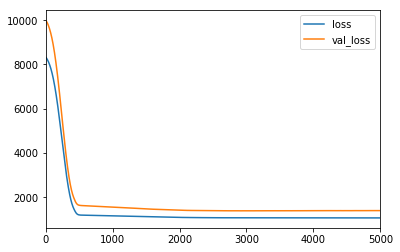

In [ ]:
#For tuning Hyper-Parameters
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, predictions))

MAE: 27.85627894516444
MSE: 2012.4765855590167
RMSE: 44.86063514440045
Explained Variance Score: 0.1106908761684372


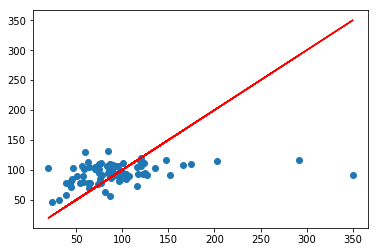

In [ ]:
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, 'r')

In [ ]:
sns.distplot((y_test-predictions),bins=50);

NameError: ignored

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))